## Install necessary libraries

In [1]:
from qiskit import QuantumCircuit
from qiskit import QuantumRegister, ClassicalRegister
import numpy as np

## Adding the qubits to the circuit
Three qubits will be required, namely, $\ket{\psi}$, $\ket{a_0}$ and $\ket{a_1}$. The qubits $\ket{\psi}$ and $\ket{a_0}$ are with Alice and $\ket{a_1}$ is with Bob. All of them are in the state $\ket{0}$ initially. For this assignment, we will take $\ket{\psi} = 0.6\ket{0} + 0.8\ket{1}$. In quantum teleportation, $\ket{a_0}$ and $\ket{a_1}$ are to be entangled first. This is done by the Hadamard and CNOT gate at the start of the circuit. Then, we measure $\ket{\psi}$ and $\ket{a_0}$ in the Bell basis. Their measurement values are stored in $m_0$ and $m_1$. $Z^{m_0}X^{m_1}$ is then applied to $a_1$ which transfers the state which was present in $\ket{\psi}$ to $\ket{a_1}$. This is how the quantum teleportation circuit works.

In [2]:
teleportation_circuit = QuantumCircuit()
a = QuantumRegister(2, 'a')
psi = QuantumRegister(1, 'psi')
teleportation_circuit.add_register(psi)
teleportation_circuit.add_register(a)

## Making the quantum circuit

In [3]:
# Give the psi state the value 0.6|0> + 0.8|1>
teleportation_circuit.initialize([0.6, 0.8], 0, 0)
# teleportation_circuit.initialize(0, 0, 0)
# Visual aid
teleportation_circuit.barrier()

# Entanglement of a[0] and a[1]
teleportation_circuit.h(a[1]) 
teleportation_circuit.cx(a[1], a[0])
# Visual aid
teleportation_circuit.barrier()

# Alice now prepares the qubits psi and a_0 for measurement in Bell basis
teleportation_circuit.cx(psi, a[[0]])
teleportation_circuit.h(psi)
# Visual aid
teleportation_circuit.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(1, 'psi'), 0), Qubit(QuantumRegister(2, 'a'), 0), Qubit(QuantumRegister(2, 'a'), 1)), clbits=())

In [4]:
teleportation_circuit.draw()

┌─────────────────────┐ ░            ░      ┌───┐ ░ 
psi: ┤ Initialize(0.6,0.8) ├─░────────────░───■──┤ H ├─░─
     └─────────────────────┘ ░      ┌───┐ ░ ┌─┴─┐└───┘ ░ 
a_0: ────────────────────────░──────┤ X ├─░─┤ X ├──────░─
                             ░ ┌───┐└─┬─┘ ░ └───┘      ░ 
a_1: ────────────────────────░─┤ H ├──■───░────────────░─
                             ░ └───┘      ░            ░

### Measuring the qubits $\ket{\psi}$ and $\ket{a_0}$

In [5]:
# Classical registers for storing values of measurements of psi and a_0
m = ClassicalRegister(3, 'm')
teleportation_circuit.add_register(m)

# Measure psi and a_0
teleportation_circuit.measure(psi, m[0])
teleportation_circuit.measure(a[0], m[1])

In [6]:
teleportation_circuit.draw()

┌─────────────────────┐ ░            ░      ┌───┐ ░ ┌─┐   
psi: ┤ Initialize(0.6,0.8) ├─░────────────░───■──┤ H ├─░─┤M├───
     └─────────────────────┘ ░      ┌───┐ ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐
a_0: ────────────────────────░──────┤ X ├─░─┤ X ├──────░──╫─┤M├
                             ░ ┌───┐└─┬─┘ ░ └───┘      ░  ║ └╥┘
a_1: ────────────────────────░─┤ H ├──■───░────────────░──╫──╫─
                             ░ └───┘      ░            ░  ║  ║ 
m: 3/═════════════════════════════════════════════════════╩══╩═
                                                          0  1

### Applying $Z^{m_0}X^{m_1}$ to $\ket{a_1}$

In [7]:
teleportation_circuit.x(a[1]).c_if(m[1], 1)
teleportation_circuit.z(a[1]).c_if(m[0], 1)
teleportation_circuit.barrier()

/tmp/ipykernel_1745370/1712252502.py:1: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  teleportation_circuit.x(a[1]).c_if(m[1], 1)
/tmp/ipykernel_1745370/1712252502.py:2: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  teleportation_circuit.z(a[1]).c_if(m[0], 1)


CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(1, 'psi'), 0), Qubit(QuantumRegister(2, 'a'), 0), Qubit(QuantumRegister(2, 'a'), 1)), clbits=())

In [8]:
teleportation_circuit.draw()

┌─────────────────────┐ ░            ░      ┌───┐ ░ ┌─┐              »
psi: ┤ Initialize(0.6,0.8) ├─░────────────░───■──┤ H ├─░─┤M├──────────────»
     └─────────────────────┘ ░      ┌───┐ ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐           »
a_0: ────────────────────────░──────┤ X ├─░─┤ X ├──────░──╫─┤M├───────────»
                             ░ ┌───┐└─┬─┘ ░ └───┘      ░  ║ └╥┘   ┌───┐   »
a_1: ────────────────────────░─┤ H ├──■───░────────────░──╫──╫────┤ X ├───»
                             ░ └───┘      ░            ░  ║  ║    └─╥─┘   »
                                                          ║  ║ ┌────╨────┐»
m: 3/═════════════════════════════════════════════════════╩══╩═╡ m_1=0x1 ╞»
                                                          0  1 └─────────┘»
«                 ░ 
«psi: ────────────░─
«                 ░ 
«a_0: ────────────░─
«        ┌───┐    ░ 
«a_1: ───┤ Z ├────░─
«        └─╥─┘    ░ 
«     ┌────╨────┐   
«m: 3/╡ m_0=0x1 ╞═══
«     └─────────┘

## Measure $a_1$

In [9]:
teleportation_circuit.measure(a[1], m[2])

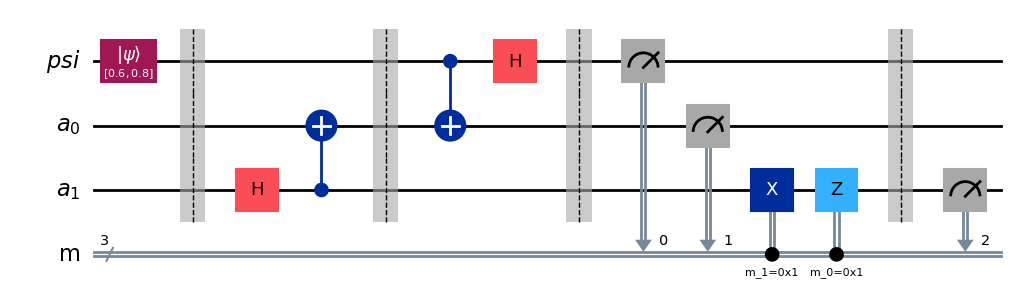

In [10]:
teleportation_circuit.draw('mpl', idle_wires=False)

## Running the Circuit

In [11]:
from qiskit_aer import AerSimulator
from qiskit import transpile
sim = AerSimulator(method='statevector')
transpiled_circuit = transpile(teleportation_circuit, sim)

We will run the circuit 4096 times and count the number of times $a_1$ is $\ket{0}$ and number of times it is $\ket{1}$. By doing this we can get the probabilities and thus can approximate the state it was in.

In [12]:
num_shots = 512
result = sim.run(transpiled_circuit, shots=num_shots).result()

In [13]:
counts = result.get_counts()
probabilities = {state: count / num_shots for state, count in counts.items()}

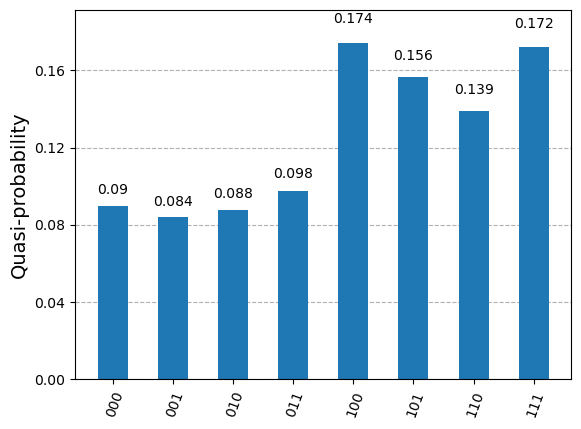

In [14]:
from qiskit.visualization import plot_histogram
plot_histogram(probabilities)

The first bit in each entry is of $a_1$. Thus we add all the entries in which the first bit was 0 for getting the probability of $a_1$ being 0 and the entries with the first bit as 1 to get the probability fo $a_1$ being 1. This way we approximate the state of $a_1$

In [15]:
p_0 = probabilities['000'] + probabilities['001'] + probabilities['010'] + probabilities['011']
p_1 = probabilities['100'] + probabilities['101'] + probabilities['110'] + probabilities['111']
print("State of Bob's qubit after teleportation:", str(round(np.sqrt(p_0), 2)) + "|0> + " + str(round(np.sqrt(p_1), 2)) + "|1>")
print("State of Alice's qubit before teleportation:", 0.6, 0.8)

State of Bob's qubit after teleportation: 0.6|0> + 0.8|1>
State of Alice's qubit before teleportation: 0.6 0.8


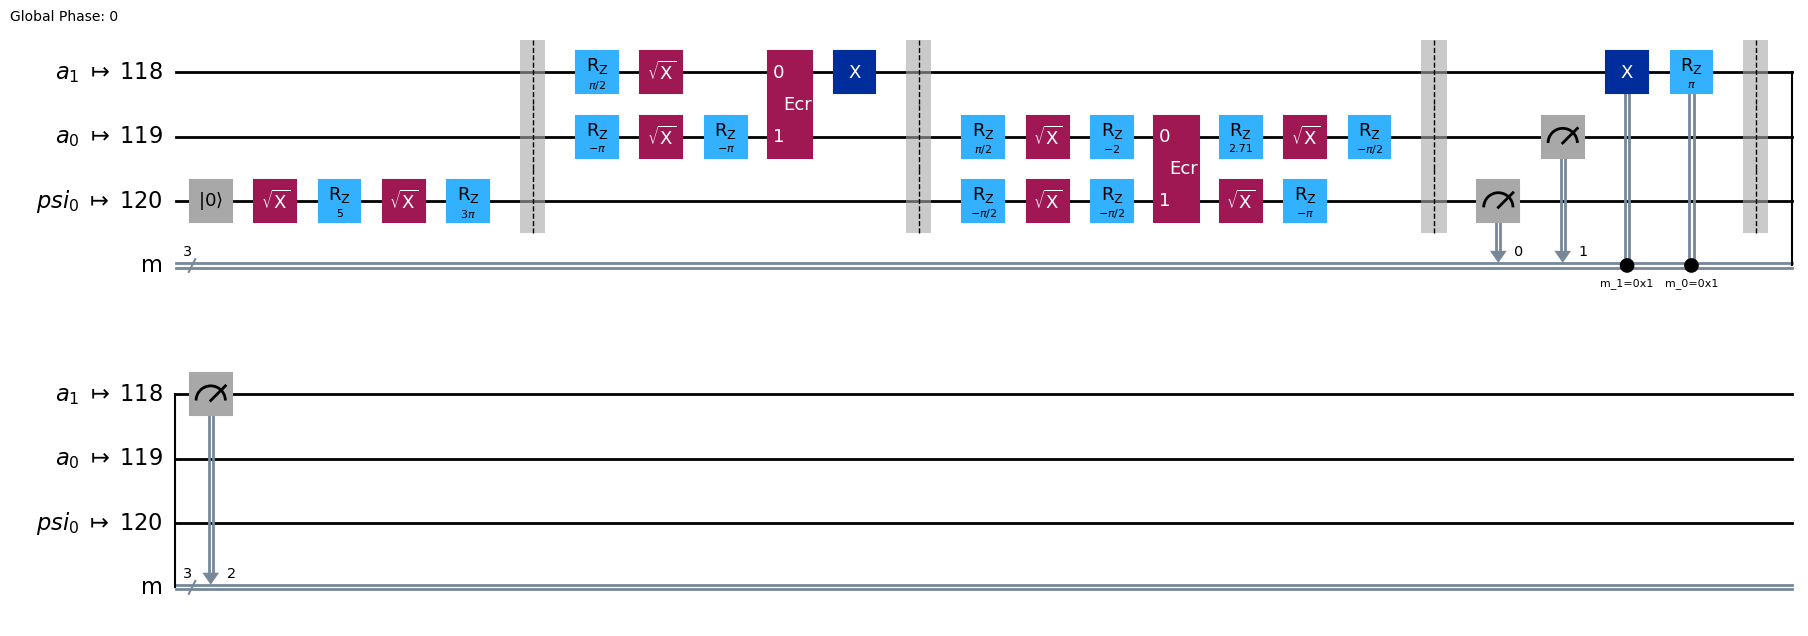

In [16]:
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler import PassManager
from qiskit_ibm_runtime import Estimator as Estimator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService

observables_labels = ['ZZZ', 'III']
observables = [SparsePauliOp(label) for label in observables_labels]

service = QiskitRuntimeService()
backend = service.least_busy(simulator=False, operational=True)
 
# Convert to an ISA circuit and layout-mapped observables.
isa_circuit = transpile(teleportation_circuit, backend=backend, optimization_level=3)
 
isa_circuit.draw("mpl", idle_wires=False)

In [17]:
estimator = Estimator(mode=backend)
estimator.options.resilience_level = 1

mapped_observables = [
    observable.apply_layout(isa_circuit.layout) for observable in observables
]
 
# One pub, with one circuit to run against five different observables.
job = estimator.run([(isa_circuit, mapped_observables)])
 
# Use the job ID to retrieve your job data later
print(f">>> Job ID: {job.job_id()}")

>>> Job ID: cxffds7fdnwg008s8dy0


In [18]:
# This is the result of the entire submission.  You submitted one Pub,
# so this contains one inner result (and some metadata of its own).
job_result = job.result()
 
# This is the result from our single pub, which had six observables,
# so contains information on all six.
pub_result = job.result()[0]

In [19]:
from qiskit_aer.primitives import Sampler
quasi_dists = Sampler().run(isa_circuit, shots=num_shots).result().quasi_dists[0]

formatted_quasi_dists = {format(k, '03b'): v for k, v in quasi_dists.items()}

print(formatted_quasi_dists)

{'001': 0.08984375, '101': 0.1640625, '000': 0.078125, '010': 0.099609375, '011': 0.083984375, '111': 0.162109375, '100': 0.16796875, '110': 0.154296875}


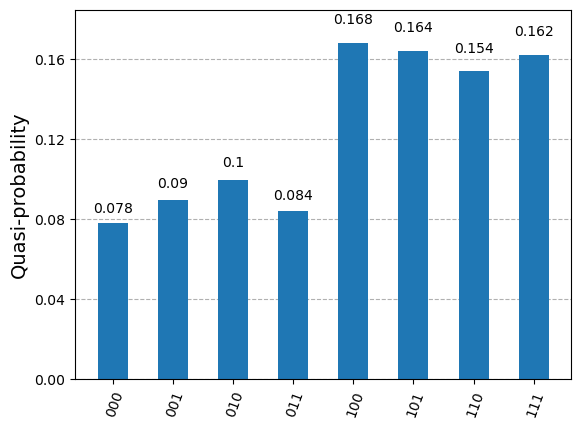

In [20]:
plot_histogram(formatted_quasi_dists)

In [21]:
ibm_p_0 = (formatted_quasi_dists['000'] + formatted_quasi_dists['001'] + formatted_quasi_dists['010'] + formatted_quasi_dists['011'])
ibm_p_1 = (formatted_quasi_dists['100'] + formatted_quasi_dists['101'] + formatted_quasi_dists['110'] + formatted_quasi_dists['111'])
print("State of Bob's qubit after teleportation:", str(round(np.sqrt(ibm_p_0), 2)) + "|0> + " + str(round(np.sqrt(ibm_p_1), 2)) + "|1>")
print("State of Alice's qubit before teleportation:", "0.6|0> + 0.8|1>")

State of Bob's qubit after teleportation: 0.59|0> + 0.81|1>
State of Alice's qubit before teleportation: 0.6|0> + 0.8|1>
